# Assignment Applied Machine Learning BSc IK 

## Notebook made by

**Gebruik graag dit formaat**

* Voor de namen:  voornaam rest van je naam, voornaam rest van je naam,....
* je studentnummers: hetzelfde: scheidt met `,`
* je emails: hetzelfde: scheidt met `,`
* voor je groep: **alleen de hoofdletter** (iets als  `A` of `B` dus)

__Namen__: Tycho Stam, Lars de Jong
    
__Emails__: tycho.stam@student.uva.nl, 2002larsdejong@gmail.com

__Student ids__ : 13303147, 13978268

__Groep__ : B

## Toelichting

* Een aantal opgaven worden automatisch nagekeken. Bij vrijwel alle opdrachten staan er een paar tests onder de opdracht, dit is voornamelijk om te zorgen dat je de juiste type output geeft. Dit zijn dus *NIET* alle tests, die komen er bij het graden nog bij.
* Elke vraag is 1 punt waard, tenzij anders aangegeven. Soms is die punt onderverdeeld in deelpunten, maar niet altijd. 

## Voor het inleveren!

* Pas niet de cellen aan, vooral niet die je niet kunt editen. Dit levert problemen op bij nakijken. Twijfel je of je per ongeluk iets hebt gewijzigd, kopieer dan bij inleveren je antwoorden naar een nieuw bestand, zodat het niet fout kan gaan.

* Zorg dat de code goed runt van boven naar beneden, verifieer dat door boven in Kernel -> Restart & Run All uit te voeren

## Na het inleveren!

* Het gebeurt erg vaak dat mensen een "leeg bestand" inleveren. Vaak een andere versie van de opgave die nog ergens op je computer rondslingerde. Zonde van al je werk toch!
* Dus, lever **minstens een half uur voor tijd in**. Download dan wat je hebt ingeleverd op Canvas. Geef het een andere naam om verwarring te voorkomen. En draai alle cellen, en bekijk het. Geen syntax fouten? Alle vragen gemaakt? Dan zit het vast wel goed, en hoef je niet in de zenuwen te zitten.

# Applied Machine Learning W2

This assignment tests the concepts that have been discussed in this week's lecture, and is divided in several (mostly) independent exercises. 

1. [Agglomerative Clustering](#agglo)
2. [DBSCAN](#dbscan)
3. [Evaluation](#elm)
4. [Data Normalization](#normalization)
5. [PCA](#pca)

### TIP
The second assignment, which asks you to implement the DBSCAN algorithm, can be a bit challenging, so don't forget about the other exercises! Just start working on another part of the assignment if you get stuck, and come back later.

In [1]:
%matplotlib inline

import os
import sys

import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from nose.tools import assert_count_equal, assert_equal
from numpy.testing import *
from sklearn import datasets
# Please do not remove this: 
np.random.seed(31415)

<a id="agglo">

# 1 Agglomerative Clustering

1. We defined the Ward criterion in class. Now you define from scratch, similar as we did with Ward, *average* and *complete*.
2. Create the complete algrithm for bottom up agglomerative clustering from scratch, giving, just like in sklearn, the possibility to choose the linking function. We will help you by having you implement the parts needed as seperate functions.
3. Use the Euclidean distance in your functions.
3. Try out your code on the iris dataset.
4. Compare it to sklearn. I mean the outcomes on the same input. 
5. Use the technique described in the book to create a dendogram.

## Tips
* explain what you are doing
* test and test and test
* refactor, refactor
* Be proud. Don't despair if it takes hours to write a few lines of code.
    * That is because Python is such a fantastic high level language.

In [2]:
# from scipy.spatial.distance import euclidean
# # Start by completing the two functions below, which both takes matrices of size n_samples*n_features
# # and return the distance between those clusters according to the linkage functions
# def average_linkage(cluster1, cluster2) -> np.float64:
#     '''calculates the average distance between cluster 1 and cluster 2'''
#     distance = [euclidean(i, j) for i in cluster1 for j in cluster2]
#     distance = sum(distance) / len(distance)
#     #WRITE YOUR CODE HERE
#     return np.float64(distance)

# def complete_linkage(cluster1, cluster2) -> np.float64:
#     '''calculates maximum distance between cluster 1 and cluster 2'''
#     distance = [euclidean(i, j) for i in cluster1 for j in cluster2]
#     distance = np.max(distance)
    
#     return np.float64(distance)

# # cluster_1 = np.random.rand(5, 2)
# # cluster_2 = np.random.rand(10, 2)
# # average_linkage(cluster_1,cluster_2)


In [3]:
# Start by completing the two functions below, which both takes matrices of size n_samples*n_features
# and return the distance between those clusters according to the linkage functions
from scipy.spatial.distance import euclidean

def average_linkage(cluster1, cluster2) -> np.float64:
    '''calculates the average distance between cluster 1 and cluster 2'''
    distance = np.mean([euclidean(x,y) for x in cluster1 for y in cluster2]) 
#     distance = np.mean(euclidean_distances(cluster1, cluster2))
    return distance

def complete_linkage(cluster1, cluster2) -> np.float64:
    '''calculates maximum distance between cluster 1 and cluster 2'''
    distance = np.max([euclidean(x,y) for x in cluster1 for y in cluster2])
    return distance

In [4]:
# check that you get the right output
cluster_1 = np.random.rand(5, 2)
cluster_2 = np.random.rand(10, 2)
assert_equal(type(average_linkage(cluster_1, cluster_2)), np.float64)

After implementing the two linkage functions, you will implement a single step of the clustering algorithm, which will return the IDs of the clusters in the input that should be merged. As input you will have both the original input data, as well as a dictionary of clusters, where each key is an ID, and each value is a list of points belonging to that cluster. You can use fancy indexing from numpy to get the rows belonging to a cluster easily:

```
# suppose we have input data X
clusters = {0: [0, 1, 2, 3], 4: [4, 6, 7]}
# get the vectors of our first cluster
cluster_vectors = X[clusters[0]]
```

In [5]:
def clustering_step(input_data, cluster_dict, linkage_type: str) -> tuple:
    ''' Function that, given an input of vectors such as in the hoorcollege slides
    {cluster_id: matrix}
    returns the SORTED IDs of the two clusters that should be merged as a list'''
    assert linkage_type in ['average', 'complete']
    
    if linkage_type == 'average':
        ids = {(i,j):average_linkage(input_data[cluster_dict[i]], input_data[cluster_dict[j]]) 
               for x,i in enumerate(cluster_dict) for y,j in enumerate(cluster_dict) if x<y}
   
    if linkage_type == 'complete':
        ids = {(i,j):complete_linkage(input_data[cluster_dict[i]], input_data[cluster_dict[j]]) 
               for x,i in enumerate(cluster_dict) for y,j in enumerate(cluster_dict) if x<y}
    

    return min(ids, key= lambda x: ids[x])

In [6]:
# def clustering_step(input_data, cluster_dict, linkage_type: str) -> tuple:    
#     ''' Function that, given an input of vectors such as in the hoorcollege slides
#     {cluster_id: matrix}
#     returns the SORTED IDs of the two clusters that should be merged as a list'''
#     assert linkage_type in ['average', 'complete']
#     cluster_ids = []
    
#     if linkage_type == 'average':
#         for x, (key1, value1) in enumerate(cluster_dict.items()):
#             for y, (key2, value2) in enumerate(cluster_dict.items()):
#                 if x != y:
#                     cluster_ids.append(tuple([key1, key2, average_linkage(input_data[value1], input_data[value2])]))
#     return tuple(sorted(cluster_ids, key=lambda x: x[2]))[0][:2]

# clustering_step(input_array, clusters, linkage_type='average')

In [7]:
input_array = np.array([
    [0, 0, 0],
    [1, 1, 1],
    [3, 3, 3]])
clusters = {0: [0], 1: [1], 2: [2]}

assert_equal(type(clustering_step(input_array, clusters, linkage_type='average')), tuple)

In our last step, we will implement the complete algorithm for agglomerative clustering, using our previously created `clustering_step` and linkage functions. For the return value, return a list of labels where each label corresponds to the class of the instance. It doesn't matter if these values are not 0/1 as long as items in the same cluster share the same label. 

**TIP**
You can delete key value pairs from dictionaries using the `del dictionary[key]` syntax

In [8]:
# in our version, we will define a number of clusters we want to find
# you may also define this in sklearn for your comparison later
def agglomerative_clustering(input_points, number_of_clusters: int, linkage_type: str):
    assert linkage_type in ['average', 'complete']
    
    # We start by just having each point in its own cluster
    # update this dictionary in the while loop.

    clusters = {i: [i] for i in range(len(input_points))}

    # Look at the stopping condition, understand why?
    while len(clusters) != number_of_clusters:
            point_ids = clustering_step(input_points, clusters, linkage_type=linkage_type)
            for j in clusters[point_ids[1]]:
                clusters[point_ids[0]].append(j)
            del clusters[point_ids[1]]
    
    # Your output should be a dict with as keys the resulting cluster IDs and as values the points belonging to
    # that cluster. It does not matter what the ID itself is.
    
    # create the output array (we will do this for you)
    output_labels = np.zeros((input_points.shape[0], 1))
    for i, point_ids in enumerate(clusters.values()):
        output_labels[point_ids] = i
    
    return output_labels

In [9]:
# Did we actually create the right amount of clusters?
samples = np.random.rand(10, 3)
labels = agglomerative_clustering(samples, number_of_clusters=4, linkage_type="average")
assert_equal(len(np.unique(labels)), 4)

In [10]:
# Compare your output with sklearn here
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters = 4, linkage="average").fit(samples)
labels1 = clustering.labels_
labels2 = agglomerative_clustering(samples, number_of_clusters=4, linkage_type="average")

# [label_1 == label_2 for label_1 in labels1 for label_2 in labels2 ]
labels1 == labels2

array([[False, False,  True,  True,  True,  True, False, False, False,
        False],
       [False, False,  True,  True,  True,  True, False, False, False,
        False],
       [ True,  True, False, False, False, False,  True, False, False,
        False],
       [ True,  True, False, False, False, False,  True, False, False,
        False],
       [ True,  True, False, False, False, False,  True, False, False,
        False],
       [ True,  True, False, False, False, False,  True, False, False,
        False],
       [False, False,  True,  True,  True,  True, False, False, False,
        False],
       [False, False, False, False, False, False, False,  True,  True,
        False],
       [False, False, False, False, False, False, False,  True,  True,
        False],
       [False, False, False, False, False, False, False, False, False,
         True]])

Now that you have created the agglomerative algorithm, create the dendogram and plot it.

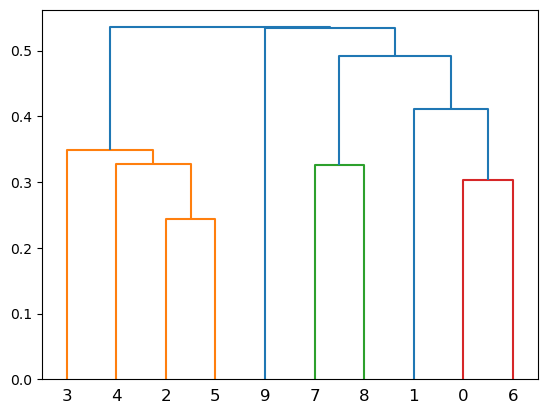

In [11]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

ytdist = samples
Z = hierarchy.linkage(ytdist, 'single')
plt.figure()
dn = hierarchy.dendrogram(Z)

<a id="dbscan" />

# 2 DBscan

In class and in section of the book 3.5.3 the DBScan algorithm was discussed.
In this assignment we are going to implement the DBScan metric from scratch, working from first principles and using euclidean distance as the distance metric.

**TIPS**
- Implementing this from scratch is a challenge, but it should be doable, make sure you really understand/can explain the algorithm before you start coding, this should already help you when programming. Like before, we will also make you implement sub functions first to help you along.
- Remember that in the algorithm we include the sample itself in the calculation of the distances and `min_samples`, you don't have to write separate logic to exlcude the point itself from the neighbour calculations.

In [ ]:
from scipy.spatial.distance import euclidean

def get_neighbours(input_data, point_index, eps) -> list:
    """
    Given the entire input data and the index of a specific point, get the indices of all
    the neighbor points, i.e. points that are closer than eps away using euclidean distance.
    """
    start = input_data[point_index]
    return [x for x in range(len(input_data)) if 0 < euclidean(start,input_data[x]) < eps]


In [ ]:
# check that the output contains integers, which should correspond
# to the indices of the neighbours
test_data = np.random.rand(5, 3)
assert_equal(type(get_neighbours(test_data, 0, eps=1)[0]), int)

In [ ]:
test_data = np.random.rand(10, 5)

get_neighbours(test_data, 0, 1)

After we have implemented the function to get all neighbours of a point for a specific point, we will write a function that, starting from a specific point, finds all neighbour points, and their neighbours points, and so on, until the cluster can no longer be expanded.

## TIPS
 - In this function and the next, we will assume points that have a value of `-1` in the cluster are ure (currently) outliers, and points with a value of `-2` have not yet been examined.

In [ ]:
clusters = {i: [i] for i in range(len(test_data))}
EPS = 0.5
MIN_SAMPLES = 4

In [ ]:
def expand(input_data, clusters, point, class_label, eps, min_samples):
    """
    Given the input data, the array with the current clusters assignments,
    and the ID for the class, return all the points in the class, iteratively
    going over neighbours, neigbours of neighbours etc.
    """
    neighbours = get_neighbours(input_data, point, eps)
    clusters[point] = class_label
    
    i = 0
    while i < len(neighbours):
        
        i += 1
    return clusters
expand(test_data, clusters, 1, [-1,-2], EPS, MIN_SAMPLES)

In the cell below we will put everything we made so far together and create the complete DBSCAN algorithm. 


In [ ]:
def dbscan(input_data, eps, min_samples):
    """
    Implements the complete dbscan algorithm using the helper functions we wrote before.
    Takes as input the complete input matrix, the maximum distance neighbours can be apart, eps,
    and the minimal number of samples that are neighbours from a point to let it be considered
    a core point. Returns an array with for each item the class label of that item, where -1
    indicates that the item is an outlier.
    """
    current_class = 0
    # start with empty cluster assignments
    clusters = [-2 for _ in range(input_data.shape[0])]
    
    for i in range(0, input_data.shape[0]):
        #WRITE YOUR CODE HERE
        
    return np.array(clusters)

Compare the output of your algorithm to the output of sklearns `DBSCAN` in the cell below, explaing your tests in the comments of the cell

### TIP

- Have a look at `make_blobs` from the sklearn.datasets module, this is a nice function with which you can easily
create some sample clusters to test your algorithm.

In [ ]:
# Compare to sklearn
from sklearn.cluster import DBSCAN

sample_data, eps, min_sample = np.random.rand(100, 3), 1, 2
clustering = DBSCAN(eps=eps, min_samples=min_sample).fit(sample_data)
clustering.labels_

<a id="elm" />

# 3 Evaluation

We can evaluate a cluster algorithm against a gold standard labelling. The tricky part then is which cluster to assign to which label. Think of Iris, and you have clustered it into 3 groups. Then which group do you want to assign to which species?

A smart idea called BCubed, and later improved to [ELM](https://dl.acm.org/doi/abs/10.1145/3539813.3545121) can be used to evaluate the quality of a clustering.

* implement ELM
* For this exercise, implement the F1 score, where you calculate F1 for each element and then average it over all elements
* test it with a number of clusterings you made of the IRIs set and another own found set with gold standard.
 - If you managed to implement your own version DBSCAN you can use these to make clusters of the IRIS dataset, otherwise just use DBSCAN from `sklearn`.
* Experiment with normalization, and see the effect.
* You are not training anything, so you simply cluster the full set and use the same set as test set.

* Next to the code, you write a small report in a markdown cell on your findings.

**TIPS**:
 - The ELM algorithm operates on points, and compares the cluster a point is in in the
 gold standard with a cluster a point is in in the prediction. 
 - Using sets is useful!
 - Start by creating a nested dict where each key is the index of a point, and each value is a dict with the indices of its neighbours, exluding the element itself. Do this for buth the gold standard and the predicted cluster.


### Test dbscan's parameters

* Using our ELM algorithm, try several options for the DBSCAN algorithm and report which values worked best.

In [ ]:
# your input will be an array of point labels, as you would get as the output of an sklearn
# model.
def ELM(gold_standard_labels, predicted_labels):
    score = []
    num_points = len(gold_standard_labels)
    #WRITE YOUR CODE HERE
      
    return score

In [ ]:
assert_equal(type(ELM([0, 1, 2, 2], [0, 0, 0, 0])), np.float64)

In [ ]:
# Try different variations of DBSCAN, and evaluate using the ELM score we just defined.


#WRITE YOUR CODE HERE

<a id="normalization" />

# Preprocessing and scaling section 3.2


1. Download iris data, and Z-transform it using your own code.
    2. Give a convincing check/test(s) that it worked.
2. Similary for the `min-max` scalar and sklearn's `normalizer`.
    * Of course you also describe in good English and with a math formula what this scaler is doing.
3. Figure out how sklearn's *RobustScaler* works, and implement it using your own code. You can use numpy to get the 1st and 3rd quartile.
4. Test all your code on iris and at least one other dataset.
    * Make your own tests which really test the math.
    * Run the same ytransformation in sklearn and use something like `assert_array_almost_equal` to test that you are close enough to sklearn's.

Answer both in code and in a markdown cell.

In [21]:
# get the iris dataset
iris_X, iris_y = sklearn.datasets.load_iris(return_X_y=True)

def z_transform(input_data):    
    output_data = (input_data - np.mean(input_data, axis=0)) / np.std(input_data, axis=0)
    return np.vstack(output_data)

def my_normalize(input_data):
    norms = np.reshape(np.linalg.norm(input_data, axis=1), (input_data.shape[0],1))
    output_data = input_data / norms
    return np.vstack(output_data)    

def min_max(input_data, min_val, max_val):   
#     standard = (input_data - min_val) / (max_val - min_val)
#     output_data = standard * (standard.max() - standard.min()) + standard.min()
    output_data = (input_data - min_val) / (max_val - min_val)
    return np.vstack(output_data)

def robust_scaler(input_data):
    IQR = np.percentile(input_data, 75) - np.percentile(input_data, 25)
    
#     output_data = (input_data - np.percentile(input_data, 25)) / (np.percentile(input_data, 75) - np.percentile(input_data, 25))
    
#     Replace IQR values of 0 with a small value to avoid division by zero
    if IQR == 0: IQR = 1e-12
        
    output_data = (input_data - np.mean(input_data)) / IQR
    
    return np.vstack(output_data)

Briefly describe for each scaler what they do (and give the formula)

> **Z-transform or standard Scaler:**
> $$ \frac{x - mean(x)}{sd(x)} $$
> the Standard Scaler assumes that the data within each feature follows a normal distribution, and it transforms the data to have a mean of 0 and a standard deviation of 1 by centering the distribution around 0 and removing the mean.



> **Normalize:**
> $$ \frac{x - x_{min}}{x_{min} - x_{min}} $$
> Samples that contain at least one non-zero component are independently rescaled so that their norm, or magnitude, is equal to one.

> **Min Max:**
> $$ \frac{x - x_{min}}{x_{max} - x_{min}} $$
> The min-max scaling technique adjusts the values of each feature to fall within a specified range.


> **Robust:**
> $$ \frac{x - Q_1(x)}{Q_3(x) - Q_1(x)} $$
> The Robust Scaler is a feature scaling method that is resilient to outliers in the data. It is similar to the MinMax Scaler, but instead of using the minimum and maximum values, it employs the interquartile range (IQR). The median and scales of the data are adjusted based on the quantile range, which makes it robust to outliers.

For each of the functions you implemented above, write tests in the cell below to make sure your scaling is correct

In [22]:
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler, RobustScaler

# z-transform
print("Z-fransform accuracy: {}%".format(round(
    (z_transform(iris_X) == StandardScaler().fit_transform(iris_X)).mean() * 100),2))

# normalize
print("Normalize accuracy: {}%".format(round(
    (my_normalize(iris_X) == Normalizer().fit_transform(iris_X)).mean() * 100),2))

#min max
print("Min Max accuracy: {}%".format(round(
    (min_max(iris_X, iris_X.min(axis=0), iris_X.max(axis=0)) == MinMaxScaler().fit_transform(iris_X)).mean() * 100),2))

# robust
print("Robust accuracy: {}%".format(round(
    (robust_scaler(iris_X) == RobustScaler().fit_transform(iris_X)).mean() * 100),2))

Z-fransform accuracy: 100%
Normalize accuracy: 84%
Min Max accuracy: 49%
Robust accuracy: 0%


<a id="pca" />

# PCA

### inspect
* get the sklearn digit dataset.
* transform it to 2 dimensions using PCA, you are allowed to use the `sklearn` function for this exercise.
* plot it in 2 dimensions using seaborn and use the `hue` parameter to see how much the digits are separated.
* Does it make sense? Do you see similar "confusions/overlap" as seen before in the book between certain digits?
 - Play around with the color palete to ensure that the different classes have clearly different colours.


### cluster

Run K-means on this reduced data (2 instead of 64 dimensions!), also run K-means on the original data. Then compare the two using the ELM-metric. For this experiment you are allowed to use the K means algorithm from sklearn.

In [ ]:
from sklearn.decomposition import PCA
# Load in the digit dataset
digits_X, digits_y = sklearn.datasets.load_digits(return_X_y=True)
# You are allowed to fix the pca to always return two dimensions
def perform_pca(input_vectors):
    output_vectors = None
    
    #WRITE YOUR CODE HERE

    return output_vectors

In [ ]:
assert_equal(perform_pca(digits_X).shape[-1], 2)

In [ ]:
# Implement your plotting here
import matplotlib.pyplot as plt
#WRITE YOUR CODE HERE

Does your plot make sense? Do you see similar overlaps as in the book?

YOUR ANSWER HERE

In [ ]:
# Compare K means on both the reduced and unreduced data and evaluation using ELM.
from sklearn.cluster import KMeans

#WRITE YOUR CODE HERE